<a href="https://colab.research.google.com/github/Ali-Ahmed999/LangGraph/blob/main/class01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00_edges_nodes_graph.**ipynb**

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [ ]:
from typing_extensions import TypedDict

class LearningState(TypedDict):
    prompt: str

In [ ]:
# prompt: create an example from above LearningState
lahore_state: LearningState = LearningState(prompt= "hello from UMT Lahore")


In [ ]:
print(lahore_state)
print(lahore_state['prompt'])
print(lahore_state['prompt'] +" I am")
print(lahore_state)
print(type(lahore_state))

{'prompt': 'hello from UMT Lahore'}
hello from UMT Lahore
hello from UMT Lahore I am
{'prompt': 'hello from UMT Lahore'}
<class 'dict'>


In [ ]:

def node_1(state: LearningState) -> LearningState:
  print("---Node 1 State---", state)
  return {"prompt": state['prompt'] +" I am"}

def node_2(state: LearningState) -> LearningState:
  print("---Node 2 State---", state)
  return {"prompt": state['prompt'] +" happy!"}

In [ ]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=LearningState)


In [ ]:
# Nodes
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)

In [ ]:
# Simples Edges Logic
builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_2", END)

In [ ]:
graph: CompiledStateGraph = builder.compile()

In [ ]:
print(graph)

In [ ]:
print(graph.get_graph())

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langchain_core.utils.pydantic.LangGraphInput'>, metadata=None), 'node_1': Node(id='node_1', name='node_1', data=node_1(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), 'node_2': Node(id='node_2', name='node_2', data=node_2(tags=None, recurse=True, func_accepts_config=False, func_accepts={'writer': False, 'store': False}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langchain_core.utils.pydantic.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='__start__', target='node_1', data=None, conditional=False), Edge(source='node_1', target='node_2', data=None, conditional=False), Edge(source='node_2', target='__end__', data=None, conditional=False)])


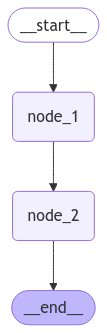

In [ ]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"prompt" : "my name is ali"})

---Node 1 State--- {'prompt': 'my name is ali'}
---Node 2 State--- {'prompt': 'my name is ali I am'}


{'prompt': 'my name is ali I am happy!'}

In [ ]:
%pip install -q -U langchain
%pip install -q -U langchain-google-genai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
google_api_key = userdata.get('GEMINI_API_KEY')

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Initialize an instance of the ChatGoogleGenerativeAI with specific parameters
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",  # Specify the model to use
    api_key=google_api_key,     # Provide the Google API key for authentication
)

In [ ]:
# Import the AIMessage class currently will be used for typing
from langchain_core.messages.ai import AIMessage

ai_msg: AIMessage = llm.invoke("Hi?")

In [ ]:
print(ai_msg.content)
print(type(ai_msg.content))

Hi there! How can I help you today?

<class 'str'>


In [ ]:
from typing_extensions import TypedDict

class FirstLLMAgentCall(TypedDict):
    prompt: str
    output: str

In [ ]:
def node_1(state: FirstLLMAgentCall):
    print("---Node 1---", state)
    prompt = state["prompt"]
    ai_msg: AIMessage = llm.invoke(prompt)
    return {"output": ai_msg.content}

In [ ]:
zeeshan_bhai_greet_message = node_1(FirstLLMAgentCall(prompt="Hello from UMT"))
print(zeeshan_bhai_greet_message)

---Node 1--- {'prompt': 'Hello from UMT'}
{'output': 'Hello from here!  Is there anything I can help you with today?\n'}


In [ ]:
from IPython.display import Image, display # Preview Graph

from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph # type

# Build graph
builder: StateGraph = StateGraph(state_schema=FirstLLMAgentCall)

# Define Nodes
builder.add_node("node_1", node_1)

# Add Edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# Compile Graph
graph: CompiledStateGraph = builder.compile()

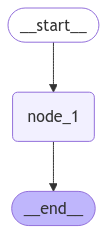

In [ ]:
# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
result = graph.invoke({"prompt" : "Motivate me to learn LangGraph"})

---Node 1--- {'prompt': 'Motivate me to learn LangGraph'}


In [ ]:
print(result)

{'prompt': 'Motivate me to learn LangGraph', 'output': "Let's talk about why learning LangGraph could be a fantastic investment of your time and energy.  Forget dry technicalities for a moment – let's focus on the *impact* and *opportunities* it unlocks:\n\n**Imagine this:**\n\n* **You're at the forefront of a revolution:**  LangGraph sits at the intersection of two incredibly powerful fields: natural language processing (NLP) and graph databases.  This is not just incremental improvement; it's a paradigm shift.  Mastering it positions you as a highly sought-after specialist in a rapidly evolving landscape.\n\n* **Solving complex problems with elegant solutions:**  Think about the messy, interconnected nature of real-world data.  LangGraph allows you to represent and reason about this data in a way that traditional NLP methods simply can't.  You'll be able to build systems that understand context, relationships, and nuances far beyond what's currently possible.  This opens doors to sol

In [ ]:
# just another helpter function
import textwrap
from IPython.display import display, Markdown

def to_markdown(text)-> Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [ ]:
print("PROMPT: ", result['prompt'])
to_markdown(result['output'])

PROMPT:  Motivate me to learn LangGraph


> Let's talk about why learning LangGraph could be a fantastic investment of your time and energy.  Forget dry technicalities for a moment – let's focus on the *impact* and *opportunities* it unlocks:
> 
> **Imagine this:**
> 
> * **You're at the forefront of a revolution:**  LangGraph sits at the intersection of two incredibly powerful fields: natural language processing (NLP) and graph databases.  This is not just incremental improvement; it's a paradigm shift.  Mastering it positions you as a highly sought-after specialist in a rapidly evolving landscape.
> 
> * **Solving complex problems with elegant solutions:**  Think about the messy, interconnected nature of real-world data.  LangGraph allows you to represent and reason about this data in a way that traditional NLP methods simply can't.  You'll be able to build systems that understand context, relationships, and nuances far beyond what's currently possible.  This opens doors to solving problems in areas like:
>     * **Knowledge graph construction and reasoning:** Building intelligent systems that understand and connect information.
>     * **Drug discovery and development:** Analyzing vast amounts of biomedical literature to identify potential drug candidates.
>     * **Financial modeling:** Understanding complex relationships between financial instruments and market events.
>     * **Supply chain optimization:**  Analyzing intricate networks to improve efficiency and resilience.
>     * **Personalized recommendations:** Building systems that understand user preferences at a much deeper level.
> 
> * **Unleashing your creativity:**  LangGraph isn't just about applying existing tools; it's about building new ones.  You'll be empowered to develop innovative applications and solutions that haven't even been conceived yet.  The possibilities are truly limitless.
> 
> * **Boosting your career prospects:**  The demand for skilled professionals in NLP and graph databases is exploding.  Adding LangGraph to your skillset will make you a highly competitive candidate for high-paying, intellectually stimulating roles.
> 
> * **Contributing to something meaningful:**  By mastering LangGraph, you'll be part of a community pushing the boundaries of AI and data science. You'll be contributing to the development of technologies that can solve some of the world's most pressing challenges.
> 
> Learning LangGraph won't be easy, but the rewards are substantial.  It's an investment in your future, your skills, and your potential to make a real impact.  Think about the problems you want to solve, the innovations you want to create, and the career you want to build.  LangGraph can be the key to unlocking them all.  Are you ready to begin?


# 01_conditional_edge.**ipynb**

In [ ]:
%%capture --no-stderr
%pip install --quiet -U langgraph

In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    user_input: str

In [ ]:
def node_1(state: State) -> State:
    print("---Node 1---", state)
    return {"user_input": state['user_input'] +" I am"}

def node_2(state: State) -> State:
    print("---Node 2---", state)
    return {"user_input": state['user_input'] +" happy!"}

def node_3(state: State) -> State:
    print("---Node 3---", state)
    return {"user_input": state['user_input'] +" sad!"}

def node_4(state: State) -> State:
  print("---Node 4---", state)
  return {"user_input": state['user_input'] +" SoSo!!"}

In [ ]:
import random

random.random()

0.9201257314473482

In [ ]:
import random

number: float = random.random() # 0 to 1

if number < 0.5:
    print("The random number is less than 0.5!")
elif number == 0.5:
    print("The random number is 0.5!")
else:
    print("The random number is more!")

# What does this do?
# The code generates a random number between 0 and 1 and checks if it is less than 0.5.
# If it's less than 0.5, it prints "The random number is less than 0.5!".
# If it's 0.5 or more, it prints "The random number is 0.5 or more!".
# The output will be different every time because of the random number!


The random number is more!


In [ ]:
import random
from typing import Literal

def decide_mood(state: State) -> Literal["node_2", "node_3", "node_4"]:

    # Often, we will use state to decide on the next node to visit
    user_input = state['user_input']

    # Here, let's just do a 50 / 50 split between nodes 2, 3
    if random.random() < 0.5:

        # 50% of the time, we return Node 2
        return "node_2"

    # 50% of the time, we return Node 3
    return "node_3"

    return "node_4"

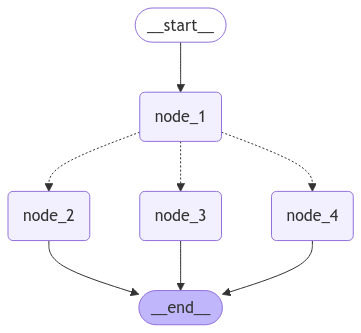

In [55]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.graph.state import CompiledStateGraph

# Build graph
builder: StateGraph = StateGraph(State)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)


# Logic
builder.add_edge(START, "node_1")
builder.add_conditional_edges("node_1", decide_mood)
builder.add_edge("node_2", END)
builder.add_edge("node_3", END)
builder.add_edge("node_4", END)


# Add
graph: CompiledStateGraph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
graph.invoke({"user_input" : "Hi, this is Ali."})

---Node 1--- {'user_input': 'Hi, this is Ali.'}
---Node 2--- {'user_input': 'Hi, this is Ali. I am'}


{'user_input': 'Hi, this is Ali. I am happy!'}